In [352]:
from selenium import webdriver
from pyvirtualdisplay import Display
from bs4 import BeautifulSoup as BS
from PIL import Image
import io
import os
import re
import base64
import numpy as np
import pytesseract

In [189]:
from IPython.display import display

In [4]:
#! pip install pytesseract

In [5]:
#! wget https://github.com/mozilla/geckodriver/releases/download/v0.12.0/geckodriver-v0.12.0-linux64.tar.gz
#! tar -xvf geckodriver-v0.12.0-linux64.tar.gz

In [5]:
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1033'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1033'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [6]:
driver = webdriver.Firefox()#executable_path=os.getcwd()+'/geckodriver')

In [7]:
home_page = 'http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do'
driver.get(home_page)

In [8]:
driver.find_element_by_xpath('//input[@name="selCmpyType"][@value="1"]').click()

In [9]:
driver.find_element_by_xpath('//input[@name="selQueryType"][@value="3"]').click()

In [8]:
driver.find_element_by_name('queryStr').send_keys('微星')

In [509]:
# reload captcha
driver.find_element_by_xpath('//img[@src="../images/kaptcha.png"]').click()

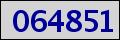

In [510]:
capt_b64 = driver.find_element_by_id('kaptcha').screenshot_as_base64
capt_img = Image.open(io.BytesIO(base64.b64decode(capt_b64)))
capt_img

In [511]:
capt_str = pytesseract.image_to_string(capt_img)
capt_str = ('').join(re.findall("[0-9]",capt_str))#('').join(capt_str.split(' '))
capt_str

'064851'

In [512]:
with open("captcha_data/%s.png"%capt_str,"wb") as capt:
    capt.write(base64.b64decode(capt_b64))
len(os.listdir('captcha_data/'))

100

In [479]:
len(os.listdir('captcha_data/'))

92

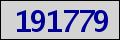

'191779'

In [249]:
Images_l = os.listdir('captcha_data/')
test_img = Image.open("captcha_data/%s"%Images_l[np.random.randint(len(Images_l))])
display(test_img)
pytesseract.image_to_string(test_img)

In [185]:
len(os.listdir('captcha_data/'))

32

In [13]:
img_code = '452386'
driver.find_element_by_name('imageCode').send_keys(img_code)

In [15]:
driver.find_element_by_name('submitData').click()

In [13]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

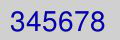

In [49]:
paint_text('345678',120,40)

In [48]:
def paint_text(text, w, h):
    font_size = 28
    background_color = (208,208,208)
    base = Image.new('RGBA', (w, h), color=background_color)
    #fonts_list = [f for f in os.listdir('fonts') if f.endswith('.ttf')]
    
    # add text
    #random_text_change_font = np.random.randint(6,size=np.random.randint(low=0,high=3))
    for ind in range(len(text)):
        #font_size = np.random.randint(23,27)
        single_text = text[ind]
        img_txt = Image.new('RGBA', (font_size+5, font_size+5), color=(0,0,0,0))
        textc_limited = (145, 170)
        text_color = (0,0,190)
                      #np.random.randint(low=textc_limited[0], high=textc_limited[1]))
        draw_txt = ImageDraw.Draw(img_txt)
        use_font = 'FreeSans.ttf'
        #if ind in random_text_change_font:
            #use_font = np.random.choice(fonts_list)
        font = ImageFont.truetype("fonts/%s"%use_font, font_size)
        draw_txt.text((0, 0), single_text, font=font, fill=text_color)
        rotate_angle = 0#np.random.randint(low=-1, high=1)
        rotate_img = img_txt#.rotate(rotate_angle, expand=np.random.randint(3))
        text_index = ind
        remain_w = 10
        each_w = int((w - remain_w * 2) / len(text))
        random_for_x = 0#np.random.randint(low=-2, high=2)
        position_x = text_index * each_w + remain_w + random_for_x
        paste_position = (position_x, 3)#np.random.randint(low=2, high=30))
        base.paste(rotate_img, paste_position, rotate_img)
    
   
    CAPTCHA_PATH = os.environ.get('CAPTCHA_PATH', 'captcha_gen')
    if not os.path.exists(CAPTCHA_PATH):
        os.makedirs(CAPTCHA_PATH)
    if os.path.exists('%s/%s.jpeg'%(CAPTCHA_PATH, text)):
        os.remove('%s/%s.jpeg'%(CAPTCHA_PATH, text))
    base.save('%s/%s.jpeg'%(CAPTCHA_PATH, text), format='JPEG', quality=80)
    while os.path.exists('%s/%s.jpeg'%(CAPTCHA_PATH, text))==False:
        pass
    base = Image.open('%s/%s.jpeg'%(CAPTCHA_PATH, text))

    return base#np.asarray(base.convert('L')).reshape(h, w, 1).astype(np.float32) / 255

In [43]:
driver.save_screenshot('quicklook.jpg')

True